In [1]:
import numpy as np
from sklearn import datasets 

In [66]:
class LC:
    def __init__(self, learning_rate = 0.1, epochs=50):
        self.lr = learning_rate
        self.epochs = epochs
        self.sigma = lambda z: (1 / (1 + np.exp(-z)))
        self.weights = None
        self.loss_history = []

    def sigma_derivative(self, z):
        return self.sigma(z) * (1 - self.sigma(z))

    def fit(self, X, y):
        self.weights = np.random.randn(X.shape[1])
        for epoch in range(self.epochs):
            self.update_weights(X, y)
            self.loss_history.append(self.average_loss(X,y))
            print(f"{epoch + 1}/{self.epochs} loss: {self.loss_history[epoch]}")
            
    def update_weights(self, X, y):
        dl_dw = 0
        N = len(X)
        
        #loop over all the examples 
        for i in range(N):
            x = X[i]
            sigma_input  = np.dot(self.weights, x)
            error  = y[i] - self.sigma(sigma_input)
            
            #2 is just some scaling number, remove it incase of model mischief
            dl_dw += -2 * x * error * self.sigma_derivative(sigma_input)

        #update the weights
        self.weights -= self.lr * (dl_dw / float(N))
    
    def average_loss(self, X, y):
        N = len(X)
        losses = [(y[i] - self.sigma(np.dot(self.weights, X[i])))**2 for i in range(N)]
        avg_loss = np.sum(np.array(losses)) / float(N)

        return avg_loss
    
    def predict(self, X):
        preds  = np.array([self.sigma(np.dot(self.weights, x)) for x in X])
        #set all values less than or equal to 0.5 to 0
        preds[preds <= 0.5] = 0
        #set all those grater than zero to 1
        preds[preds > 0] = 1
        
        return preds
        

In [61]:
X, y = datasets.make_blobs(500, n_features=3, centers=2)
split_ratio = int(0.7 * len(X))
X_train, X_test, y_train, y_test = X[:split_ratio], X[split_ratio:], y[:split_ratio], y[split_ratio:]

In [84]:
lc = LC()
lc.fit(X_train, y_train)


1/50 loss: 0.35130133765709143
2/50 loss: 0.18441698396905282
3/50 loss: 0.10715109010379711
4/50 loss: 0.07212082563944947
5/50 loss: 0.053098968186916944
6/50 loss: 0.04122640023371311
7/50 loss: 0.03308887515971425
8/50 loss: 0.02717276856594242
9/50 loss: 0.022708362902061595
10/50 loss: 0.019253498549906784
11/50 loss: 0.01652919029795562
12/50 loss: 0.014347748878875244
13/50 loss: 0.012577572108547172
14/50 loss: 0.011123839266419662
15/50 loss: 0.009916889428913899
16/50 loss: 0.008904750227871436
17/50 loss: 0.008048127382190089
18/50 loss: 0.007316951853456703
19/50 loss: 0.006687955020397778
20/50 loss: 0.006142940645651031
21/50 loss: 0.005667537856529465
22/50 loss: 0.005250290901901402
23/50 loss: 0.00488198755865846
24/50 loss: 0.004555158524755321
25/50 loss: 0.00426370060134533
26/50 loss: 0.004002590392638838
27/50 loss: 0.003767664832703347
28/50 loss: 0.003555451506251385
29/50 loss: 0.003363036401967825
30/50 loss: 0.0031879600455146434
31/50 loss: 0.00302813532410

In [85]:
predictions = lc.predict(X_test)

np.sum((y_test == predictions)) / len(X_test)

1.0

In [86]:
import matplotlib.pyplot as plt 

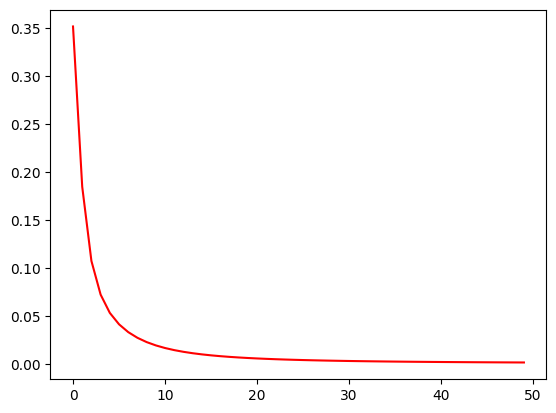

In [87]:
plt.plot(lc.loss_history, color="red")